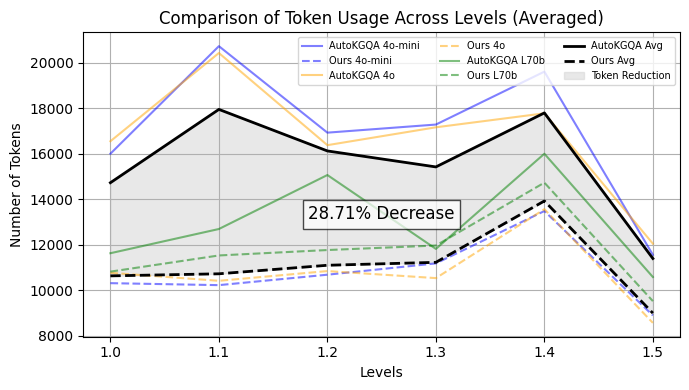

In [2]:
# Re-import necessary libraries after execution state reset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the data
data = {
    "Levels": [1, 1.1, 1.2, 1.3, 1.4, 1.5, 1, 1.1, 1.2, 1.3, 1.4, 1.5],
    "AutoKGQA_4o-mini": [15479, 19040, 15870, 13698, 13929, 16440, 16529, 22424, 17990, 20874, 25295, 6677],
    "AutoKGQA_4o": [15878, 19283, 17072, 13607, 12913, 17381, 17226, 21579, 15688, 20723, 22646, 6718],
    "AutoKGQA_L70b": [9211, 9357, 10785, 13116, 12677, 14635, 14048, 16031, 19349, 10521, 19329, 6531],
    "Ours_4o-mini": [7940, 8158, 8579, 10531, 10916, 12675, 12686, 12294, 12791, 11832, 16051, 5115],
    "Ours_4o": [8073, 8279, 8832, 10551, 10980, 12564, 13463, 12554, 12857, 10519, 16149, 4569],
    "Ours_L70b": [8828, 8925, 9696, 11872, 12451, 14290, 12811, 14137, 13843, 12064, 17012, 4756]
}

# Convert to DataFrame
df_tokens = pd.DataFrame(data)

# Set Levels as the index
df_tokens.set_index("Levels", inplace=True)

# Compute the average token size per level for each method
df_tokens["AutoKGQA_Avg"] = df_tokens[[f"AutoKGQA_{model}" for model in ["4o-mini", "4o", "L70b"]]].mean(axis=1)
df_tokens["Ours_Avg"] = df_tokens[[f"Ours_{model}" for model in ["4o-mini", "4o", "L70b"]]].mean(axis=1)

# Convert to float for numerical stability
df_tokens = df_tokens.astype(float)
# Compute the average token usage per level across the two samples
df_avg_tokens = df_tokens.groupby(df_tokens.index).mean()

# Compute the average token size per level for each method
df_avg_tokens["AutoKGQA_Avg"] = df_avg_tokens[[f"AutoKGQA_{model}" for model in ["4o-mini", "4o", "L70b"]]].mean(axis=1)
df_avg_tokens["Ours_Avg"] = df_avg_tokens[[f"Ours_{model}" for model in ["4o-mini", "4o", "L70b"]]].mean(axis=1)

# Extract x, y1, and y2 values as numpy arrays
x_values = df_avg_tokens.index.to_numpy(dtype=np.float64)
y1_values = df_avg_tokens["AutoKGQA_Avg"].to_numpy(dtype=np.float64)
y2_values = df_avg_tokens["Ours_Avg"].to_numpy(dtype=np.float64)

# Compute the overall percentage decrease
percent_decrease = ((y1_values.mean() - y2_values.mean()) / y1_values.mean()) * 100

# Create the plot
plt.figure(figsize=(7, 4))

# Define colors for each LLM
colors = {"4o-mini": "blue", "4o": "orange", "L70b": "green"}

# Plot individual model lines for AutoKGQA (solid) and Ours (dashed) using averaged values
for model in ["4o-mini", "4o", "L70b"]:
    plt.plot(x_values, df_avg_tokens[f"AutoKGQA_{model}"].to_numpy(dtype=np.float64), 
             linestyle='-', color=colors[model], alpha=0.5, label=f"AutoKGQA {model}")
    plt.plot(x_values, df_avg_tokens[f"Ours_{model}"].to_numpy(dtype=np.float64), 
             linestyle='--', color=colors[model], alpha=0.5, label=f"Ours {model}")

# Plot the average lines
plt.plot(x_values, y1_values, linestyle='-', color='black', linewidth=2, label="AutoKGQA Avg")
plt.plot(x_values, y2_values, linestyle='--', color='black', linewidth=2, label="Ours Avg")

# Fill the area between average lines
plt.fill_between(x_values, y1_values, y2_values, color='lightgrey', alpha=0.5, label="Token Reduction")

# Add text annotation in the shaded area
mid_x = np.mean(x_values)
mid_y = (y1_values.mean() + y2_values.mean()) / 2
plt.text(mid_x, mid_y, f"{percent_decrease:.2f}% Decrease", fontsize=12, color="black", 
         verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.7))

# Labels and legend
plt.xlabel("Levels")
plt.ylabel("Number of Tokens")
plt.title("Comparison of Token Usage Across Levels (Averaged)")
plt.legend(loc="upper right", fontsize=7, ncols=3)
plt.grid(True)
plt.tight_layout()
#save as pdf
plt.savefig("token_usage_comparison.pdf")
plt.show()
